**<h1> Mortality Predictions in ICU using ANN </h1>** 

Patients in the intensive care unit (ICU) face severe illness or injury and have a heightened risk of mortality. ICU mortality rates vary significantly based on the specific underlying condition, ranging from 1 in 20 for those admitted after planned surgeries to 1 in 4 for individuals with respiratory ailments. Assessing the likelihood of death involves evaluating the severity of a patient's illness through key physiological, clinical, and demographic factors.

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Handle table-like data and matrics
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

import pickle


import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('white')

In [5]:
data = pd.read_csv('train.csv',encoding='utf-8')
data

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000


In [6]:
labels = pd.read_csv('labels.csv',encoding = 'utf-8')
labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


#### Check for data cleaning

In [7]:
data.info(),labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

(None, None)

In [8]:
data.isna().sum(),labels.isna().sum()

(ALP            0
 ALT            0
 AST            0
 Age            0
 Albumin        0
 BUN            0
 Bilirubin      0
 Cholesterol    0
 Creatinine     0
 DiasABP        0
 FiO2           0
 GCS            0
 Gender         0
 Glucose        0
 HCO3           0
 HCT            0
 HR             0
 Height         0
 ICUType        0
 K              0
 Lactate        0
 MAP            0
 MechVent       0
 Mg             0
 NIDiasABP      0
 NIMAP          0
 NISysABP       0
 Na             0
 PaCO2          0
 PaO2           0
 Platelets      0
 RecordID       0
 RespRate       0
 SaO2           0
 SysABP         0
 Temp           0
 TroponinI      0
 TroponinT      0
 Urine          0
 WBC            0
 Weight         0
 pH             0
 dtype: int64,
 In-hospital_death    0
 dtype: int64)

#### Data is cleaned no need to clean the data

In [9]:
data.columns.to_list()

['ALP',
 'ALT',
 'AST',
 'Age',
 'Albumin',
 'BUN',
 'Bilirubin',
 'Cholesterol',
 'Creatinine',
 'DiasABP',
 'FiO2',
 'GCS',
 'Gender',
 'Glucose',
 'HCO3',
 'HCT',
 'HR',
 'Height',
 'ICUType',
 'K',
 'Lactate',
 'MAP',
 'MechVent',
 'Mg',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Na',
 'PaCO2',
 'PaO2',
 'Platelets',
 'RecordID',
 'RespRate',
 'SaO2',
 'SysABP',
 'Temp',
 'TroponinI',
 'TroponinT',
 'Urine',
 'WBC',
 'Weight',
 'pH']

In [10]:
data.shape,labels.shape

((3999, 42), (3999, 1))

In [11]:
data.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [12]:
labels.describe()

,In-hospital_death
count,3999.000000
mean,0.138535
std,0.345503
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Target Variable - Outcome
0 - Alive

1 - Death

In [13]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

## Lets do One Hot Encoding

#### Benifits are - 
One-hot encoding is like giving each category its special code so a computer can understand and work with it better. Imagine you have three types of fruits: apples, bananas, and oranges. Instead of saying "apple," "banana," or "orange," we assign a special code for each: 001 for apple, 010 for banana, and 100 for orange.

Why is this helpful?

1. **Simplicity for Computers**: Computers find it easier to work with numbers. With one-hot encoding, we convert categories into simple numbers (0s and 1s).

2. **Avoiding Confusion**: We want to make sure the computer doesn't get confused into thinking apples (0, 0, 1) are like bananas (0, 1, 0) or oranges (1, 0, 0).

3. **Equal Importance**: Each category gets its own unique code, showing that they are equally important and unrelated in terms of the task at hand.

4. **Compatible with Algorithms**: Many machine learning algorithms need numerical data to train and make predictions. One-hot encoding allows us to use these algorithms with categorical data.

In a nutshell, one-hot encoding helps the computer understand categories in a clear and organized way, making it easier for us to build models that learn and make accurate predictions based on these categories.

In [14]:
# One Hot Encoding
one_hot_encoded_label = []
for i in labels["In-hospital_death"]:
    if i == 0:
        one_hot_encoded_label.append([1,0])
    else:
        one_hot_encoded_label.append([0,1])

In [15]:
### To understand properly lets see the data
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_label)
one_hot_encoded_data.head()


,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
# Lets visualise it
merged_data=pd.concat([data,labels],axis=1)
merged_data.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [17]:
corr_matrix = merged_data.corr()
corr_matrix


,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
ALP,1.000000,0.114850,0.155750,0.000879,-0.137771,0.155416,0.240297,-0.006795,0.131899,-0.035320,...,-0.024257,-0.052407,-0.051107,-0.011932,-0.019689,-0.040027,0.085952,-0.021914,-0.005073,0.115577
ALT,0.114850,1.000000,0.858741,-0.112012,-0.009850,0.038541,0.109332,-0.024351,0.077210,0.024430,...,-0.067018,-0.050335,-0.017507,-0.011350,0.037490,-0.048773,0.013325,-0.001541,-0.004561,0.070992
AST,0.155750,0.858741,1.000000,-0.088649,-0.037277,0.051244,0.127767,-0.020751,0.092024,0.030425,...,-0.095091,-0.053931,-0.014374,-0.012664,0.081825,-0.064821,0.032749,0.008551,-0.001068,0.108484
Age,0.000879,-0.112012,-0.088649,1.000000,-0.036231,0.228768,-0.063837,-0.010103,0.033369,-0.263634,...,0.021496,0.009608,-0.146972,0.043898,0.051547,-0.255105,0.034414,-0.177945,0.025433,0.130701
Albumin,-0.137771,-0.009850,-0.037277,-0.036231,1.000000,-0.100987,-0.086068,0.058119,-0.030867,0.077583,...,0.035633,0.103017,0.006044,0.009577,0.039915,0.102044,-0.099285,0.000732,0.007397,-0.126925
BUN,0.155416,0.038541,0.051244,0.228768,-0.100987,1.000000,0.185473,-0.014453,0.683278,-0.119703,...,-0.037919,-0.042018,-0.182530,0.072952,0.042128,-0.195167,0.101356,0.079346,-0.007620,0.223369
Bilirubin,0.240297,0.109332,0.127767,-0.063837,-0.086068,0.185473,1.000000,-0.017119,0.140630,-0.031563,...,-0.003182,-0.053594,-0.091075,-0.007221,-0.016851,-0.076323,0.018515,0.033972,-0.006371,0.174017
Cholesterol,-0.006795,-0.024351,-0.020751,-0.010103,0.058119,-0.014453,-0.017119,1.000000,-0.023809,0.072380,...,0.008578,0.011681,0.014865,-0.021201,0.036640,0.013926,-0.010553,-0.012247,-0.004304,-0.008578
Creatinine,0.131899,0.077210,0.092024,0.033369,-0.030867,0.683278,0.140630,-0.023809,1.000000,-0.072456,...,-0.019475,-0.030945,-0.108552,0.034726,0.047885,-0.162525,0.032108,0.091286,0.006364,0.117615
DiasABP,-0.035320,0.024430,0.030425,-0.263634,0.077583,-0.119703,-0.031563,0.072380,-0.072456,1.000000,...,-0.003486,0.594665,0.047105,0.000694,0.009634,0.119911,-0.019035,0.045176,-0.011028,-0.050506


### Finding the parameters which are more preferable for training


in correlation matrix we found whose value positive is more preferable so,we filter the parameter names in below


In [18]:
corr_dead =corr_matrix['In-hospital_death']
corr_dead[corr_dead>0]

ALP                  0.115577
ALT                  0.070992
AST                  0.108484
Age                  0.130701
BUN                  0.223369
Bilirubin            0.174017
Creatinine           0.117615
Glucose              0.105764
HR                   0.073561
K                    0.018713
Lactate              0.124184
Mg                   0.061766
Na                   0.021979
RespRate             0.031718
TroponinI            0.053133
TroponinT            0.034866
WBC                  0.094936
pH                   0.024961
In-hospital_death    1.000000
Name: In-hospital_death, dtype: float64

In [19]:
corr_dead[corr_dead>0]

ALP                  0.115577
ALT                  0.070992
AST                  0.108484
Age                  0.130701
BUN                  0.223369
Bilirubin            0.174017
Creatinine           0.117615
Glucose              0.105764
HR                   0.073561
K                    0.018713
Lactate              0.124184
Mg                   0.061766
Na                   0.021979
RespRate             0.031718
TroponinI            0.053133
TroponinT            0.034866
WBC                  0.094936
pH                   0.024961
In-hospital_death    1.000000
Name: In-hospital_death, dtype: float64

In [20]:
corr_dead[corr_dead>0]


ALP                  0.115577
ALT                  0.070992
AST                  0.108484
Age                  0.130701
BUN                  0.223369
Bilirubin            0.174017
Creatinine           0.117615
Glucose              0.105764
HR                   0.073561
K                    0.018713
Lactate              0.124184
Mg                   0.061766
Na                   0.021979
RespRate             0.031718
TroponinI            0.053133
TroponinT            0.034866
WBC                  0.094936
pH                   0.024961
In-hospital_death    1.000000
Name: In-hospital_death, dtype: float64

In [21]:
new_data=merged_data[corr_dead[corr_dead>0].index.to_list()]
new_data.head()

,ALP,ALT,AST,Age,BUN,Bilirubin,Creatinine,Glucose,HR,K,Lactate,Mg,Na,RespRate,TroponinI,TroponinT,WBC,pH,In-hospital_death
0,77.0,31.0,46.0,54,10.500000,0.7,0.750000,160.000000,70.810811,4.20,1.900000,1.700000,136.500000,17.428571,2.1,0.14,10.300000,7.387273,0
1,77.0,31.0,46.0,76,18.333333,0.7,1.100000,125.500000,80.794118,3.90,1.900000,2.300000,137.000000,19.000000,2.1,0.14,11.266667,7.395000,0
2,116.0,83.0,199.5,44,4.666667,2.9,0.333333,134.333333,83.759259,4.26,1.366667,1.720000,138.333333,19.000000,2.1,0.14,4.700000,7.495000,0
3,105.0,12.0,15.0,68,17.666667,0.2,0.766667,117.333333,70.983333,4.00,1.900000,2.033333,139.333333,15.457627,2.1,0.14,9.400000,7.387273,0
4,77.0,31.0,46.0,88,35.000000,0.7,1.000000,102.500000,74.958333,4.32,1.900000,1.550000,139.500000,19.166667,2.1,0.14,4.300000,7.387273,0


### Lets clean the data

The `StandardScaler` in scikit-learn is a tool used for standardizing features by removing the mean and scaling to unit variance. Let's break down the benefits of using `StandardScaler` in an easy-to-understand manner:

1. **Mean Removal**: It centers the feature columns around zero by removing the mean. This is important because many machine learning algorithms assume that the features are centered around zero.

2. **Unit Variance Scaling**: It scales the feature columns to have a standard deviation of 1. This is crucial because features with different scales might lead the machine learning algorithm to assign more weight to features with larger scales, potentially causing issues in the model's performance.

   Imagine you have a feature like "Income" ranging from 20,000 to 200,000 and another feature like "Age" ranging from 0 to 100. Without scaling, the algorithm might give more importance to "Income" just because its values are larger, even if "Age" is equally important.

3. **Makes Optimization Easier**: Many optimization algorithms (e.g., gradient descent) work faster and are more stable when features are on a similar scale. Scaling helps in reaching the optimal solution more quickly.

4. **Maintains Relationships Between Features**: It ensures that the relative relationships (e.g., correlations) between features remain the same after scaling. Scaling doesn't change the relationships; it just puts them on a consistent scale.

In summary, `StandardScaler` is a preprocessing step that helps in preparing the data for machine learning models, ensuring fair treatment of all features and facilitating a smoother optimization process during model training.


In more easy manner-
Of course! Imagine you have a bunch of different things to eat, like fruits and snacks. But these things come in different sizes and shapes. Some are big, some are small. It's like comparing apples and oranges, literally!

Now, let's say you want to compare them in a fair way. You want to be able to say which one you like the most, not just because it's bigger or smaller, but because of its own taste. To do that, you need to make sure they're all in the same size.

The StandardScaler is like a magical machine that takes these fruits and snacks and makes them all the same size, just like if you were comparing all fruits to be the same size as an apple. This way, when you say which one you like the most, it's based on taste, not size.

In the world of computers and numbers (which is like a big playground for math), we have numbers that are like those fruits and snacks. They come in different sizes. StandardScaler helps us make them all the same size, so when we use them in a special math game called a machine learning game, they play fair and everyone gets a fair chance to show how important they are.

So, it's like making sure all our fruits and snacks are the same size before we decide which one is the yummiest! 🍎🍊🍇🍪

In [22]:
majority_class = new_data[new_data['In-hospital_death'] == 0]
minority_class = new_data[new_data['In-hospital_death'] == 1]

# Upsample minority class
minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_class_upsampled])

In [68]:
len(minority_class),len(majority_class),len(minority_class_upsampled)
minority_class_upsampled['In-hospital_death'].value_counts()
balanced_data['In-hospital_death'].value_counts()
minority_class['In-hospital_death'].value_counts()

1    554
Name: In-hospital_death, dtype: int64

In [35]:
x = balanced_data.drop('In-hospital_death', axis=1)
y = balanced_data['In-hospital_death']

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: In-hospital_death, dtype: int64

In [38]:
x.head()

,ALP,ALT,AST,Age,BUN,Bilirubin,Creatinine,Glucose,HR,K,Lactate,Mg,Na,RespRate,TroponinI,TroponinT,WBC,pH
0,77.0,31.0,46.0,54,10.500000,0.7,0.750000,160.000000,70.810811,4.20,1.900000,1.700000,136.500000,17.428571,2.1,0.14,10.300000,7.387273
1,77.0,31.0,46.0,76,18.333333,0.7,1.100000,125.500000,80.794118,3.90,1.900000,2.300000,137.000000,19.000000,2.1,0.14,11.266667,7.395000
2,116.0,83.0,199.5,44,4.666667,2.9,0.333333,134.333333,83.759259,4.26,1.366667,1.720000,138.333333,19.000000,2.1,0.14,4.700000,7.495000
3,105.0,12.0,15.0,68,17.666667,0.2,0.766667,117.333333,70.983333,4.00,1.900000,2.033333,139.333333,15.457627,2.1,0.14,9.400000,7.387273
4,77.0,31.0,46.0,88,35.000000,0.7,1.000000,102.500000,74.958333,4.32,1.900000,1.550000,139.500000,19.166667,2.1,0.14,4.300000,7.387273


In [40]:
len(x.columns),len(x),len(y)

(18, 6890, 6890)

In [78]:
# sc = StandardScaler()
# transformed_data = sc.fit_transform(x)
# transformed_data[:1]

#### MinMaxScaler

Sure, let's explain Min-Max Scaler in a simple way!

Imagine you have a collection of toys, like toy cars and toy dolls. Each toy has a different height and width. Now, let's say you want to play with these toys in a dollhouse where the rooms are of a certain size.

The Min-Max Scaler is like a magic machine that helps you resize your toys in a way that they all fit nicely into the rooms of the dollhouse. It adjusts the size of each toy, making sure they all fit comfortably.

In the world of numbers and data (which is like a big puzzle), we have numbers that are like those toys with different sizes. Min-Max Scaler helps us resize these numbers so they all fit nicely in a specific range, like from 0 to 1.

Why is this useful? Well, in some games or puzzles, we want all our numbers to be in a certain range so they can play nicely together, just like the toys fitting into the dollhouse rooms. Min-Max Scaler helps us achieve this fair play by resizing the numbers to fit within the desired range.

So, it's like making sure our toys fit nicely in the dollhouse rooms, and Min-Max Scaler helps us do the same with our numbers! 🏠🚗🎎


#### Technical-

Absolutely! Let's delve a bit more into the technical details of Min-Max Scaler.

Min-Max Scaler is a technique used in data preprocessing, specifically for feature scaling, in the field of machine learning and data analysis. Its purpose is to transform the features (columns) of a dataset so that they fall within a specified range, typically [0, 1]. The formula to achieve this scaling for each feature \(X\) is:

\[X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}\]

where:
- \(X\) is an original value of a feature,
- \(X_{\text{min}}\) is the minimum value of that feature in the dataset,
- \(X_{\text{max}}\) is the maximum value of that feature in the dataset.

Here's a breakdown:

- It subtracts the minimum value (\(X_{\text{min}}\)) of the feature from each value, so the minimum value becomes 0.
- Then, it divides by the range of the feature (\(X_{\text{max}} - X_{\text{min}}\)), so the maximum value of the feature becomes 1.

This transformation is particularly useful when you want to ensure that each feature contributes equally to the computation or analysis, especially in cases where the features have different units or scales. It's commonly applied to features that need to be on a similar scale, but not necessarily in a specific statistical distribution.

In simpler terms, Min-Max Scaler helps in resizing the features so that they all fit nicely in a range, like making sure all your toys fit nicely in the dollhouse rooms (the desired range). This helps in fair comparisons and computations in machine learning models.

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
transformed_data = scaler.fit_transform(x)

In [42]:
#### Just checking how our data looking in transformed way

checking = pd.DataFrame(transformed_data)
checking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.044510,0.003063,0.002552,0.520000,0.048937,0.012968,0.033831,0.265339,0.502890,0.125926,0.017730,0.103448,0.471402,0.236506,0.03681,0.00541,0.074380,0.008801
1,0.044510,0.003063,0.002552,0.813333,0.095403,0.012968,0.055360,0.182869,0.576927,0.103704,0.017730,0.206897,0.480830,0.290485,0.03681,0.00541,0.081429,0.008864
2,0.071217,0.008752,0.012345,0.386667,0.014335,0.060519,0.008202,0.203984,0.598917,0.130370,0.011426,0.106897,0.505971,0.290485,0.03681,0.00541,0.033544,0.009682
3,0.063684,0.000985,0.000574,0.706667,0.091448,0.002161,0.034856,0.163347,0.504170,0.111111,0.017730,0.160920,0.524827,0.168803,0.03681,0.00541,0.067817,0.008801
4,0.044510,0.003063,0.002552,0.973333,0.194266,0.012968,0.049209,0.127888,0.533649,0.134815,0.017730,0.077586,0.527970,0.296210,0.03681,0.00541,0.030627,0.008801


In [43]:
x = transformed_data

In [44]:
print(x.shape,y.shape)

(6890, 18) (6890,)


### Splitting Dataset

In [45]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [46]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(5512, 18) (1378, 18) (5512,) (1378,)


## Building  Model

In [47]:
# Put models in dicionary
models = {"Logistic Regression": LogisticRegression(),
          
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes":GaussianNB(),
          "SVM":svm.SVC(kernel='linear'),
          "Gradient Boosting":GradientBoostingClassifier()}

# see for example here name = KNN and model =KNeighborsClassifier()

# Create function to fit and score model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given ml model
    models: a dictionary of different scilit-learn machine learning models
    x_train : training data
    x_test : testing data
    """
    # set up random seed
    np.random.seed(42)
    # Make a dicitionary to keep models
    model_score = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_score
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [48]:
model_score = fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

{'Logistic Regression': 0.6734397677793904,
 'Random Forest': 0.9724238026124818,
 'Gaussian Naive Bayes': 0.5899854862119013,
 'SVM': 0.6705370101596516,
 'Gradient Boosting': 0.7685050798258345}

In [49]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
model.score(x_test,y_test)

0.9702467343976778

## Model Comparision

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Gaussian Naive Bayes'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'Gradient Boosting')])

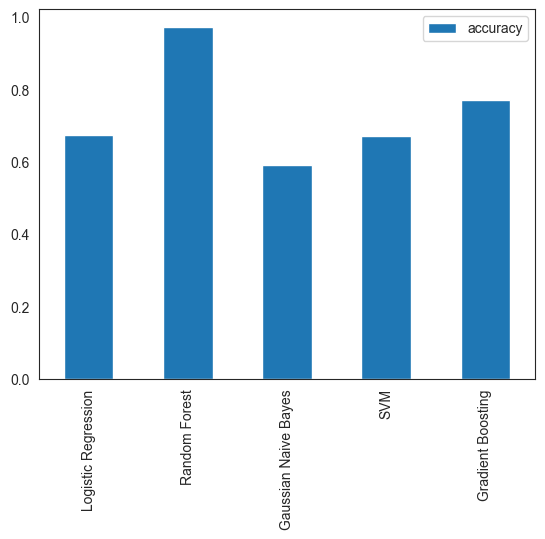

In [51]:
model_compare=pd.DataFrame(model_score, index=["accuracy"])
# model_compare.plot.bar(); # give close bar to each other try it
model_compare.T.plot.bar()
plt.xticks(rotation=90)

we will do following:

-> Hyperparameter Tuning

-> Feauture importance

-> Confusion matrix

-> Cross-Validation

-> Precision

-> Recall

-> F1 score

-> Classification report

-> ROC curve

-> Area under the curve(AUC)

## Hypertuning with GridSearchCV

### What is GridSearchCV used for?

Ans-> GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model. It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations. It then evaluates each combination using cross-validation and selects the one that produces the best performance. GridSearchCV helps in automating the process of hyperparameter tuning, enhancing model performance, and avoiding manual trial-and-error.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
Parameters currently in use:

{'bootstrap': True,

 'criterion': 'mse',

 'max_depth': None,
 
 'max_features': 'auto',
 
 'max_leaf_nodes': None,
 
 'min_impurity_decrease': 0.0,
 
 'min_impurity_split': None,
 
 'min_samples_leaf': 1,
 
 'min_samples_split': 2,
 
 'min_weight_fraction_leaf': 0.0,
 
 'n_estimators': 10,
 
 'n_jobs': 1,
 
 'oob_score': False,
 
 'random_state': 42,
 'verbose': 0,
 
 'warm_start': False}


-> n_estimators = number of trees in the foreset

-> max_features = max number of features considered for splitting a node

-> max_depth = max number of levels in each decision tree

-> min_samples_split = min number of data points placed in a node before the node is split

-> min_samples_leaf = min number of data points allowed in a leaf node

-> bootstrap = method for sampling data points (with or without replacement)


### Example Code

from sklearn.model_selection import RandomizedSearchCV



##### Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

##### Number of features to consider at every split
max_features = ['auto', 'sqrt']

##### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)
##### Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

##### Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

##### Method of selecting samples for training each tree
bootstrap = [True, False]

##### Create the random grid
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,
               
               'max_depth': max_depth,
               
               'min_samples_split': min_samples_split,
               
               'min_samples_leaf': min_samples_leaf,
               
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False],

 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 
 'max_features': ['auto', 'sqrt'],
 
 'min_samples_leaf': [1, 2, 4],
 
 'min_samples_split': [2, 5, 10],
 
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [90]:
# #  Different hyperparameters for our LogisticRegression Model
# np.random.seed(42)
# model = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [100, 200, 300,400,500],
#     'max_depth': [10, 20, 30,40,50]
# }
# # here taking param_grid value anything as later on we will find it best param

# # Setup grid hyperparameter search for LogisticRegression
# gs_rf =GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


# # # Fit the model
# gs_rf.fit(x_train,y_train)

In [91]:
# gs_rf.best_params_

In [52]:
##### Now lets train on new best param
np.random.seed(42)
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [400],
    'max_depth': [50]
}
# here taking param_grid value anything as later on we will find it best param

# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')



# # Fit the model
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50], 'n_estimators': [400]},
             scoring='accuracy')

In [53]:
gs_rf.score(x_test,y_test)

0.9738751814223512

### Export the model

In [54]:
with open('model.pkl', 'wb') as f:
    pickle.dump(gs_rf, f)

In [55]:
y_preds=gs_rf.predict(x_test)

In [56]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       691
           1       0.96      0.99      0.97       687

    accuracy                           0.97      1378
   macro avg       0.97      0.97      0.97      1378
weighted avg       0.97      0.97      0.97      1378



In [57]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [58]:
loaded_model.score(x_test,y_test)

0.9738751814223512